<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S8/s8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S8_modules/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S8_modules


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [3]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


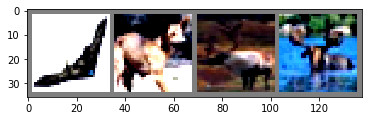

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [6]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [9]:
epochs = 20

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  scheduler.step()
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.0736314058303833 Batch_id=781 Accuracy=51.05: 100%|██████████| 782/782 [00:31<00:00, 24.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0161, Accuracy: 6375/10000 (63.75%)



Epoch= 1 Loss=1.1647428274154663 Batch_id=781 Accuracy=70.94: 100%|██████████| 782/782 [00:31<00:00, 24.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0143, Accuracy: 7014/10000 (70.14%)



Epoch= 2 Loss=0.6032612919807434 Batch_id=781 Accuracy=77.87: 100%|██████████| 782/782 [00:30<00:00, 25.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 7811/10000 (78.11%)



Epoch= 3 Loss=0.5559483766555786 Batch_id=781 Accuracy=81.40: 100%|██████████| 782/782 [00:31<00:00, 24.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 8040/10000 (80.40%)



Epoch= 4 Loss=0.4075036942958832 Batch_id=781 Accuracy=83.97: 100%|██████████| 782/782 [00:31<00:00, 24.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0093, Accuracy: 8038/10000 (80.38%)



Epoch= 5 Loss=0.5117745399475098 Batch_id=781 Accuracy=85.86: 100%|██████████| 782/782 [00:31<00:00, 24.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8285/10000 (82.85%)



Epoch= 6 Loss=0.40888285636901855 Batch_id=781 Accuracy=91.08: 100%|██████████| 782/782 [00:31<00:00, 24.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8718/10000 (87.18%)



Epoch= 7 Loss=0.7897129058837891 Batch_id=781 Accuracy=92.02: 100%|██████████| 782/782 [00:30<00:00, 25.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8765/10000 (87.65%)



Epoch= 8 Loss=0.2672734260559082 Batch_id=781 Accuracy=92.92: 100%|██████████| 782/782 [00:30<00:00, 25.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8760/10000 (87.60%)



Epoch= 9 Loss=0.13770148158073425 Batch_id=781 Accuracy=93.64: 100%|██████████| 782/782 [00:31<00:00, 24.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8787/10000 (87.87%)



Epoch= 10 Loss=0.014724016189575195 Batch_id=781 Accuracy=94.32: 100%|██████████| 782/782 [00:31<00:00, 24.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8782/10000 (87.82%)



Epoch= 11 Loss=0.3965541124343872 Batch_id=781 Accuracy=94.77: 100%|██████████| 782/782 [00:31<00:00, 24.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8818/10000 (88.18%)



Epoch= 12 Loss=0.054011017084121704 Batch_id=781 Accuracy=96.00: 100%|██████████| 782/782 [00:31<00:00, 25.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8843/10000 (88.43%)



Epoch= 13 Loss=0.20998775959014893 Batch_id=781 Accuracy=96.50: 100%|██████████| 782/782 [00:31<00:00, 25.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8854/10000 (88.54%)



Epoch= 14 Loss=0.047305166721343994 Batch_id=781 Accuracy=96.55: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8864/10000 (88.64%)



Epoch= 15 Loss=0.031533628702163696 Batch_id=781 Accuracy=96.81: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8838/10000 (88.38%)



Epoch= 16 Loss=0.047734856605529785 Batch_id=781 Accuracy=97.04: 100%|██████████| 782/782 [00:31<00:00, 25.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8855/10000 (88.55%)



Epoch= 17 Loss=0.28878793120384216 Batch_id=781 Accuracy=97.02: 100%|██████████| 782/782 [00:31<00:00, 24.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8880/10000 (88.80%)



Epoch= 18 Loss=0.11687950789928436 Batch_id=781 Accuracy=97.31: 100%|██████████| 782/782 [00:31<00:00, 24.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8873/10000 (88.73%)



Epoch= 19 Loss=0.18559473752975464 Batch_id=781 Accuracy=97.43: 100%|██████████| 782/782 [00:31<00:00, 25.16it/s]



Validation set: Average loss: 0.0060, Accuracy: 8883/10000 (88.83%)



# Result visualization

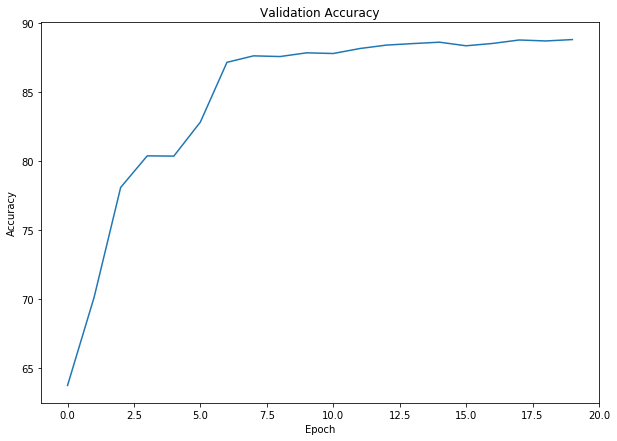

In [23]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

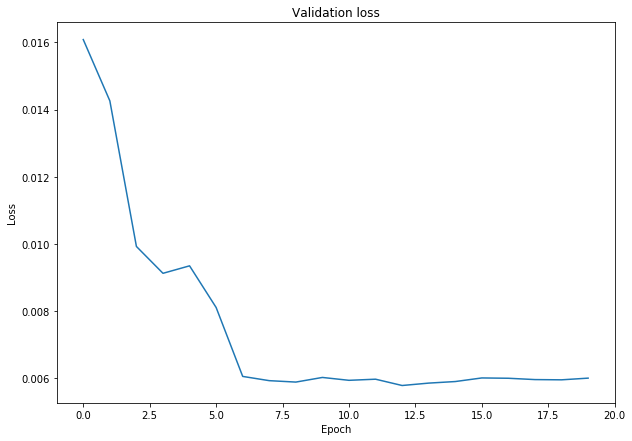

In [24]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse   car  deer  ship


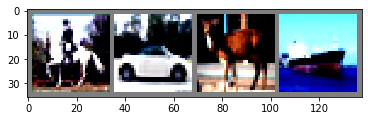

In [12]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   car  deer  ship


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [15]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:02<00:00, 53.07it/s]

Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 88 %
Accuracy of   cat : 84 %
Accuracy of  deer : 93 %
Accuracy of   dog : 85 %
Accuracy of  frog : 88 %
Accuracy of horse : 91 %
Accuracy of  ship : 100 %
Accuracy of truck : 94 %
